In [2]:
from full_script_2 import pdf_creator
import pandas as pd
import shutil
import os

#Raw table
raw_table = pd.read_csv("tess_sector_91_92.csv",skiprows=[0, 1],names=["update_date","main_id","TICID","gaiadr3_id","CCD","Tmag","RA","Dec","sector","count","sp_type","sp_qual","plx_value","V","B","G","otype","nbref","rvz_radvel","rvz_redshift","gaiadr3_plx","gaiadr3phot_g_mean_mag","gaiadr3_bp_rp","abs_mag_rough"])

#Creating scuti line
point_1 = (0.24,2)
point_2 = (0.12,4)

m = (point_1[1]-point_2[1])/(point_1[0] - point_2[0])
b= (point_1[1]-m*point_1[0])
#tolerance = 5 #height of diagonal band
tolerance = 7

#creating boolean mask
raw_table['gaiadr3_bp_rp'] = pd.to_numeric(raw_table['gaiadr3_bp_rp'], errors='coerce')
raw_table['abs_mag_rough'] = pd.to_numeric(raw_table['abs_mag_rough'], errors='coerce')
raw_table.dropna(subset=['gaiadr3_bp_rp', 'abs_mag_rough'], inplace=True)


diagonal_mask = (abs(raw_table['abs_mag_rough'] - (m * raw_table['gaiadr3_bp_rp'] + b)) <= tolerance)

filtered_table = raw_table[diagonal_mask]

#Creating List of Chosen TICIDs
tic_ids = filtered_table['TICID']

id_list = tic_ids.tolist()

int_id_list = [int(f) for f in id_list]

print(len(int_id_list))

158


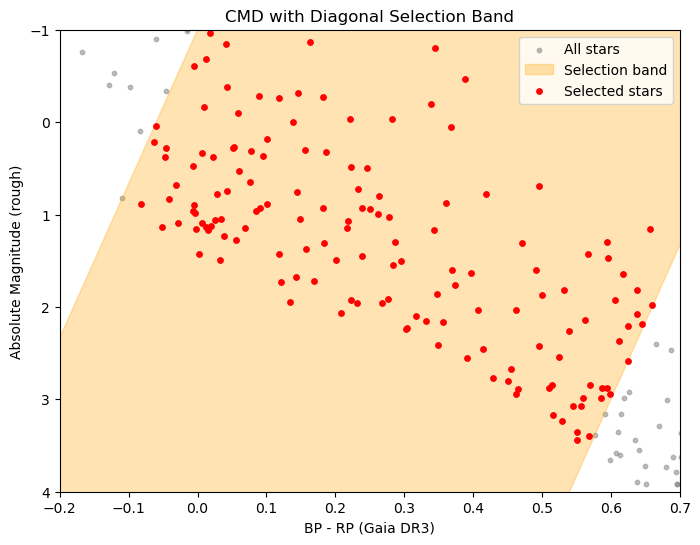

In [3]:
#Visualising the selected region
import matplotlib.pyplot as plt
import numpy as np

# Scatter all stars
plt.figure(figsize=(8, 6))
plt.scatter(raw_table['gaiadr3_bp_rp'], raw_table['abs_mag_rough'], s=10, color='grey', alpha=0.5, label='All stars')

# Define range for x (colour)
x_vals = np.linspace(raw_table['gaiadr3_bp_rp'].min(), raw_table['gaiadr3_bp_rp'].max(), 500)

# Define central line and bounds
y_central = m * x_vals + b
y_upper = y_central + tolerance
y_lower = y_central - tolerance

# Plot the scuti band
plt.fill_between(x_vals, y_lower, y_upper, color='orange', alpha=0.3, label='Selection band')

# Plot selected points
plt.scatter(filtered_table['gaiadr3_bp_rp'], filtered_table['abs_mag_rough'], s=15, color='red', label='Selected stars')

# Label axes
plt.xlabel('BP - RP (Gaia DR3)')
plt.ylabel('Absolute Magnitude (rough)')
plt.title('CMD with Diagonal Selection Band')
plt.legend()
plt.ylim(-1,4)
plt.xlim(-0.2,0.7)

# Invert y-axis (since lower magnitude = brighter)
plt.gca().invert_yaxis()

plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(raw_table['gaiadr3_bp_rp'], raw_table['abs_mag_rough'], s=10, color='blue', alpha=0.5, label='All stars')

In [5]:
#Creating pdfs 

for value in int_id_list:
    pdf_creator(value)

No Spoc result found


/Users/aidan/Desktop/Uni/Second year/Astrophysics and Relativity/SSP Project/Coding/full_script_2.py:102: RuntimeWarning: invalid value encountered in sqrt
  amp = np.sqrt(sc) * fct * 1e6


KeyboardInterrupt: 

In [15]:
#Clearing Cache
cache_dir = "/Users/aidan/.lightkurve/cache/mastDownload/TESS"
if os.path.exists(cache_dir):
    shutil.rmtree(cache_dir)
    print("✅ Deleted all cached TESS files.")
else:
    print("No cache directory found.")

✅ Deleted all cached TESS files.
